In [ ]:
# Basic Deterministic Methods
def count_sarw(L, pos=(0, 0), visited=None):
    if visited is None:
        visited = set()
    
    if L == 0:
        return 1
    
    visited.add(pos)
    
    moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Up, Right, Down, Left
    count = 0
    
    for dx, dy in moves:
        new_pos = (pos[0] + dx, pos[1] + dy)
        if new_pos not in visited:
            count += count_sarw(L - 1, new_pos, visited.copy())
    
    return count

L = 2  # Example saw length
print(count_sarw(L))


12


0.189776
[0.042115, 0.028876, 0.019337, 0.013228, 0.008963, 0.005944, 0.003979, 0.002751, 0.00184, 0.001214, 0.000824, 0.000537, 0.000374, 0.000251, 0.000185, 0.000103, 7.1e-05, 5e-05, 3.2e-05, 2e-05, 1.7e-05, 9e-06, 9e-06, 4e-06, 2e-06, 2e-06, 1e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


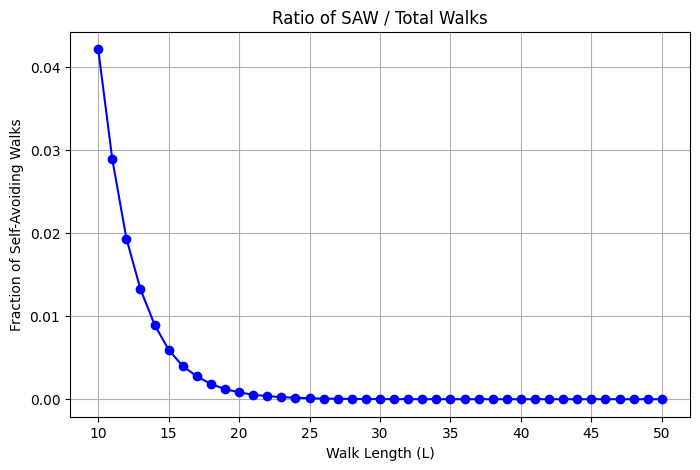

[2.914094772471522, 2.898069608353787, 2.8791154679607986, 2.867870549147387, 2.85631869564332, 2.8422694343914605, 2.831691013279986, 2.827755076763841, 2.819067182961293, 2.8092980448876457, 2.8045058607125113, 2.7947597576242234, 2.79435402803438, 2.7894852297513055, 2.795924759379493, 2.7705977699141027, 2.7700844205536415, 2.771804427089815, 2.7639465063420583, 2.7543970394816153, 2.7737987964008917, 2.7497525955861186, 2.7821469789566717, 2.744644191738394, 2.7192129914952754, 2.7493642226723924, 2.725168276231845, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


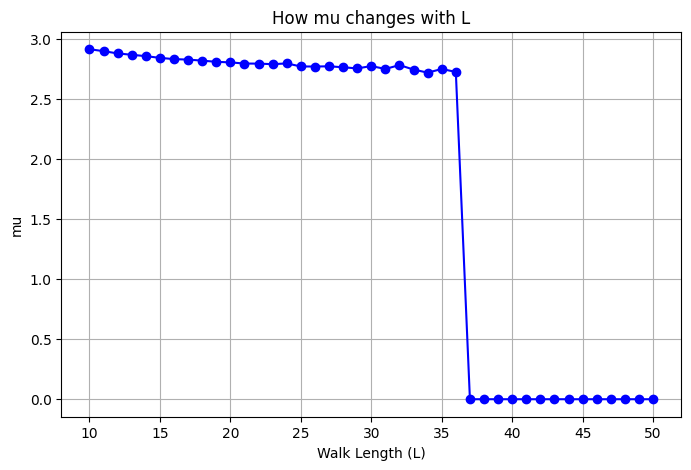

[1.0, 1.0, 0.749444, 0.563137, 0.390854, 0.276932, 0.190534, 0.132723, 0.090337, 0.062152, 0.041809]
[1.0, 4.0, 11.991104, 36.040768, 100.058624, 283.578368, 780.427264, 2174.533632, 5920.325632, 16292.773888, 43839.913984]


In [ ]:
# Basic Monte Carlo I
import random
import matplotlib.pyplot as plt

def random_saw(L):
    pos = (0, 0)
    visited = {pos}
    moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Up, Right, Down, Left
    
    for _ in range(L):
        dx, dy = random.choice(moves)
        new_pos = (pos[0] + dx, pos[1] + dy)
        if new_pos in visited:
            return False  # Not a self-avoiding saw
        visited.add(new_pos)
        pos = new_pos
    
    return True  # Self-avoiding saw

def estimate_sarw_fraction(L, trials=1000000):
    count_sarw = sum(random_saw(L) for _ in range(trials))
    return count_sarw / trials

L = 6  # Example saw length
trials = 1000000  # Number of trials
print(estimate_sarw_fraction(L, trials))

# Plot SAW / total saw ratio for L = 10 to 50
L_values = range(10, 51)
ratios = [estimate_sarw_fraction(L, trials) for L in L_values]
print(ratios)


plt.figure(figsize=(8, 5))
plt.plot(L_values, ratios, marker='o', linestyle='-', color='b')
plt.xlabel('saw Length (L)')
plt.ylabel('Fraction of Self-Avoiding saws')
plt.title('Ratio of SAW / Total saws')
plt.grid()
plt.show()

#Values of mu as L increases
mu = []
L_values = range(10, 51)
for i, r in enumerate(ratios):
    mu.append(4 * r**(1/L_values[i]))

print(mu)

# Plot value of mu for L = 10 to 50

plt.figure(figsize=(8, 5))
plt.plot(L_values, mu, marker='o', linestyle='-', color='b')
plt.xlabel('saw Length (L)')
plt.ylabel('mu')
plt.title('How mu changes with L')
plt.grid()
plt.show()

#cL when L = 0 to 10
small_L_values = range(0, 11)
small_ratios = [estimate_sarw_fraction(L, trials) for L in small_L_values]
print(small_ratios)
cL = []
for i, r in enumerate(small_ratios):
    cL.append(4**small_L_values[i] * r)
print(cL)

In [ ]:
# Basic Monte Carlo II (untested)
def sophisticated_random_saw(L):
    pos = (0, 0)
    visited = {pos}
    moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Up, Right, Down, Left
    
    saw = [pos]
    for _ in range(L - 1):
        valid_moves = [(pos[0] + dx, pos[1] + dy) for dx, dy in moves if (pos[0] + dx, pos[1] + dy) not in visited]
        
        if valid_moves:
            pos = random.choice(valid_moves)
            visited.add(pos)
        
        saw.append(pos)
    
    return saw

def estimate_c_N(L, trials=10000):
    total_saws = 0
    self_avoiding_saws = 0
    
    for _ in range(trials):
        saw = sophisticated_random_saw(L)
        total_saws += 1
        if len(set(saw)) == L:  # Fully self-avoiding
            self_avoiding_saws += 1
    
    return self_avoiding_saws / total_saws

L = 6  # Example saw length
trials = 10000  # Number of trials
print(estimate_c_N(L, trials))

1.0


Acceptance rate for L=10: 0.6191
Acceptance rate for L=20: 0.5620
Acceptance rate for L=30: 0.5289
Acceptance rate for L=40: 0.5048
Acceptance rate for L=50: 0.4900


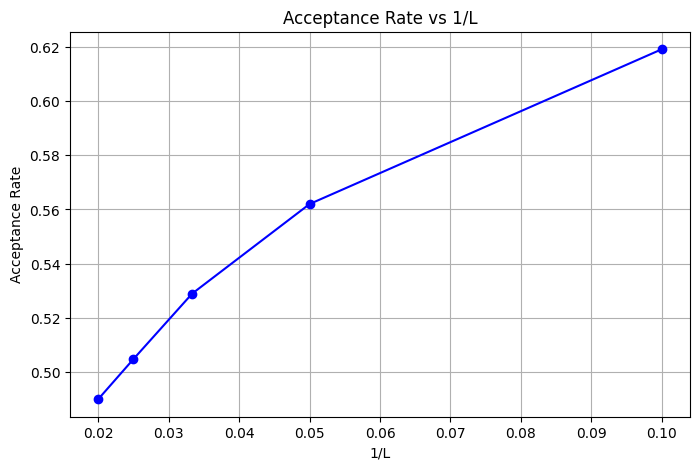

In [ ]:
#MCMC

import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt

def generate_initial_saw(L):
    """Initial straight walk (L steps = L+1 points)."""
    return [(i, 0) for i in range(L+1)]

def apply_pivot(walk, pivot_idx):
    """Apply random symmetry operation to the segment after pivot_idx."""
    pivot = walk[pivot_idx]
    segment = walk[pivot_idx+1:]
    
    # Symmetry operations (rigid transformations in 2D)
    operations = [
        lambda p: (2 * pivot[0] - p[0], p[1]),       # X-reflection
        lambda p: (p[0], 2 * pivot[1] - p[1]),       # Y-reflection
        lambda p: (pivot[0] - (p[1] - pivot[1]),     # +90° rotation
                pivot[1] + (p[0] - pivot[0])),
        lambda p: (pivot[0] + (p[1] - pivot[1]),     # -90° rotation
                pivot[1] - (p[0] - pivot[0])),
        lambda p: (2 * pivot[0] - p[0], 2 * pivot[1] - p[1]),  # 180° rotation
        lambda p: (pivot[1] + pivot[0] - p[1],       # Diagonal flip over y = x
                pivot[0] + pivot[1] - p[0]),
        lambda p: (pivot[1] - (p[0] - pivot[0]),     # Diagonal flip over y = -x
                pivot[0] - (p[1] - pivot[1]))
    ]
    op = random.choice(operations)
    new_segment = [op(p) for p in segment]
    new_walk = walk[:pivot_idx+1] + new_segment
    
    # Check self-avoidance (exact coordinate comparison)
    # Exact coordinate comparison
    if len({(round(x,5), round(y,5)) for x,y in new_walk}) == len(new_walk):
        return new_walk
    return None  # Reject if invalid

def MCMC_SAW(L, num_steps, num_chains, reject):
    """Improved MCMC for SAWs with pivot moves."""
    unique_counts = defaultdict(int)
    accepted_moves  = 0
    
    
    for _ in range(num_chains):
        current = generate_initial_saw(L)
        unique_counts[tuple(current)] += 1
        #reject is meant to reject the first few moves to allow the chain to equilibrate (not sure if it makes a impact)
        rejected = reject
        
        for __ in range(num_steps):
            pivot_point = random.randint(1, L-1)
            new_walk = apply_pivot(current, pivot_point)
            
            if new_walk is not None and rejected <= 0:
                current = new_walk
                accepted_moves  += 1
                unique_counts[tuple(current)] += 1
            else:
                rejected -= 1
            #unique_saws.add(tuple(current))
    
    return accepted_moves  / (num_steps * num_chains)


L = 5           # Small L for testing (exact c_L for L=5 is 396 on square lattice)
num_steps = 10000 # Steps per chain
num_chains = 10  # Independent chains

# Estimation
mu_estimates = []
acceptance_rates = []
for L in range(10, 51, 10):
    acceptance_rate = MCMC_SAW(L, num_steps, num_chains, 100)
    acceptance_rates.append(acceptance_rate)
    print(f"Acceptance rate for L={L}: {acceptance_rate:.4f}")

#plot acceptance rates against 1/L
plt.figure(figsize=(8, 5))# Set figure size
plt.plot([1/L for L in range(10, 51, 10)], acceptance_rates, marker='o', linestyle='-', color='b')
plt.xlabel('1/L')  # X-axis label
plt.ylabel('Acceptance Rate')  # Y-axis label
plt.title('Acceptance Rate vs 1/L')  # Title of the plot
plt.grid()  # Show grid
plt.show()  # Display the plot



In [ ]:
acceptance_rates = []

Lstart = 100
Lend = 2000
num_steps = 10000 # Steps per chain
num_chains = 100  # Independent chains

for L in range(Lstart, Lend, 50):
    acceptance_rate = MCMC_SAW(L, num_steps, num_chains, 100)
    acceptance_rates.append(acceptance_rate)
    print(f"L = {L}, Acceptance Rate = {acceptance_rate:.4f}")


[0.4168693834703354, 0.3859603226440396, 0.3654300865915842, 0.3502606895728793, 0.33833502703074797, 0.3285693673732094, 0.3203381046471968, 0.31324894888535215, 0.3070405244316857, 0.301530389701948, 0.2965864204167691, 0.29211002523080454, 0.28802578728854555, 0.28427479823037055, 0.28081021528926753, 0.27759421042018867, 0.2745958207891339, 0.271789400058918, 0.26915348039269155, 0.2666699215621366, 0.26432326476338125, 0.2621002349976261, 0.25998935300198267, 0.25798062913371433, 0.2560653193710946, 0.25423572896190116, 0.2524850530236944, 0.2508072460915188, 0.2491969145547043, 0.24764922734914524, 0.24615984132655944, 0.2447248385120617, 0.2433406730585447, 0.24200412616206532, 0.24071226755322747, 0.23946242245179822, 0.23825214308470025, 0.2370791840352305]
[0.4394, 0.4085, 0.39193, 0.38112, 0.36659, 0.36096, 0.3513, 0.34593, 0.34269, 0.33628, 0.33497, 0.33082, 0.32786, 0.32397, 0.31925, 0.31754, 0.31541, 0.31429, 0.3166, 0.31307, 0.31176, 0.31087, 0.30709, 0.30431, 0.30741, 0

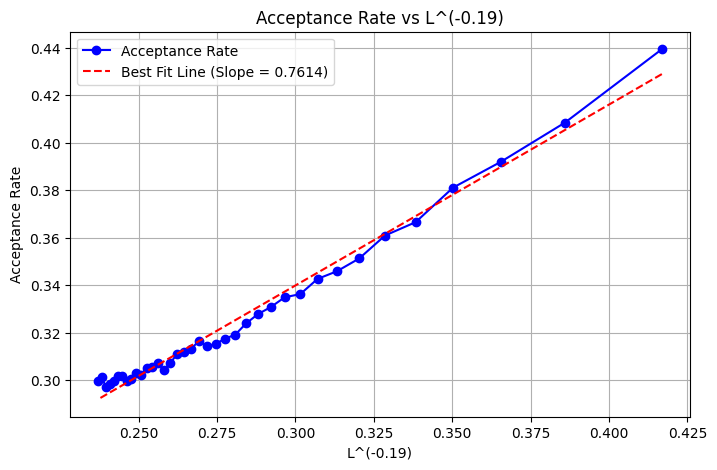

Estimated μ ≈ 2.6268


In [40]:
# Generate x-values (L^(-0.19)) and acceptance rates
x_values = [L**-0.19 for L in range(Lstart, Lend, 50)]
y_values = acceptance_rates
print(x_values)
print(y_values)

m, c = np.polyfit(x_values, y_values, 1)

best_fit_y = [m * x + c for x in x_values]

# Plot data points
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='Acceptance Rate')
plt.plot(x_values, best_fit_y, linestyle='--', color='r', label=f'Best Fit Line (Slope = {m:.4f})')

# Labels and grid
plt.xlabel('L^(-0.19)')  
plt.ylabel('Acceptance Rate')  
plt.title('Acceptance Rate vs L^(-0.19)')  
plt.legend()
plt.grid()
plt.show()

# Print estimated 1/mu
print(f"Estimated μ ≈ {1/(m*0.5):.4f}")

